In [46]:
import pandas as pd
import numpy as np

In [2]:
path = '../data/gini-complete.csv'
df =  pd.read_csv(path)


In [3]:
path = '../data/immigre.csv'
df2 =  pd.read_csv(path, sep =';')
df2.head()


,countries,Employment_rate-Foreign-born,Employment_rate-Native-born,Unemployment rate-Foreign-born,Unemployment rate-Native-born,Participation rate-Foreign-born,Participation rate-Native-born
0,Australia,69.9,73.5,6.2,6.2,74.6,78.3
1,Austria,64.7,72.8,10.7,4.6,72.4,76.3
2,Belgium,53.3,63.6,17.0,6.8,64.2,68.3
3,Canada,71.0,73.0,7.4,6.9,76.7,78.4
4,Czech_Republic,71.1,70.2,6.8,5.1,76.3,73.9


In [4]:
df3 = pd.merge(df, df2, on='countries', how='inner')
df3.head()

,countries,Gini,Employment_rate-Foreign-born,Employment_rate-Native-born,Unemployment rate-Foreign-born,Unemployment rate-Native-born,Participation rate-Foreign-born,Participation rate-Native-born
0,Mexico,48.3,51.8,60.8,5.4,4.5,54.7,63.7
1,United_States,45.0,69.2,67.2,5.0,5.6,72.9,71.1
2,Israel,42.8,78.0,65.9,4.3,5.5,81.4,69.7
3,Turkey,40.2,44.4,50.3,12.8,10.4,50.9,56.1
4,Greece,36.7,52.2,50.6,32.0,24.4,76.9,66.9


In [5]:
df_corr = df3.corr()

In [6]:
df_corr

,Gini,Employment_rate-Foreign-born,Employment_rate-Native-born,Unemployment rate-Foreign-born,Unemployment rate-Native-born,Participation rate-Foreign-born,Participation rate-Native-born
Gini,1.000000,-0.154423,-0.478796,-0.105497,0.209514,-0.258956,-0.505791
Employment_rate-Foreign-born,-0.154423,1.000000,0.719585,-0.633271,-0.545524,0.805685,0.644740
Employment_rate-Native-born,-0.478796,0.719585,1.000000,-0.494467,-0.687779,0.546342,0.931250
Unemployment rate-Foreign-born,-0.105497,-0.633271,-0.494467,1.000000,0.874089,-0.053662,-0.193196
Unemployment rate-Native-born,0.209514,-0.545524,-0.687779,0.874089,1.000000,-0.028324,-0.377265
Participation rate-Foreign-born,-0.258956,0.805685,0.546342,-0.053662,-0.028324,1.000000,0.683265
Participation rate-Native-born,-0.505791,0.644740,0.931250,-0.193196,-0.377265,0.683265,1.000000


In [7]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Gini Correlation')
    labels=['Gini','Employment_rate-Foreign-born', 'Employment_rate-Native-born', 'Unemployment rate-Foreign-born',
           'Unemployment rate-Native-born', 'Participation rate-Foreign-born','Participation rate-Native-born']
    ax1.set_xticklabels(labels,fontsize=12, rotation=90)
    ax1.set_yticklabels(labels,fontsize=12)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[-0.1, -0.3, -0.5, -0.76, -0.8, -0.9, 0.0, .1,.3,.5,.7,.9,1])
    plt.show()

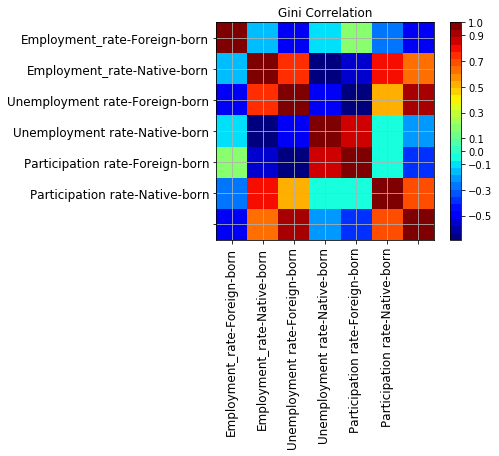

In [8]:
correlation_matrix(df3)

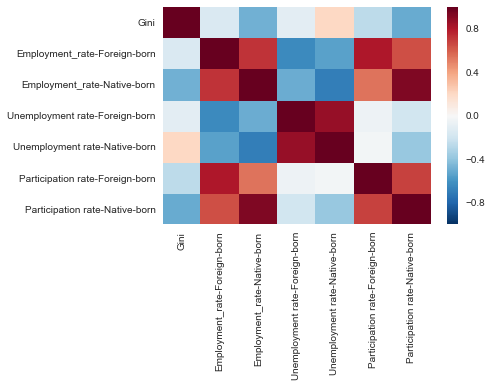

In [9]:
import seaborn as sns
%matplotlib inline
# calculate the correlation matrix
corr = df3.corr()

# plot the heatmap
sns.heatmap(corr)


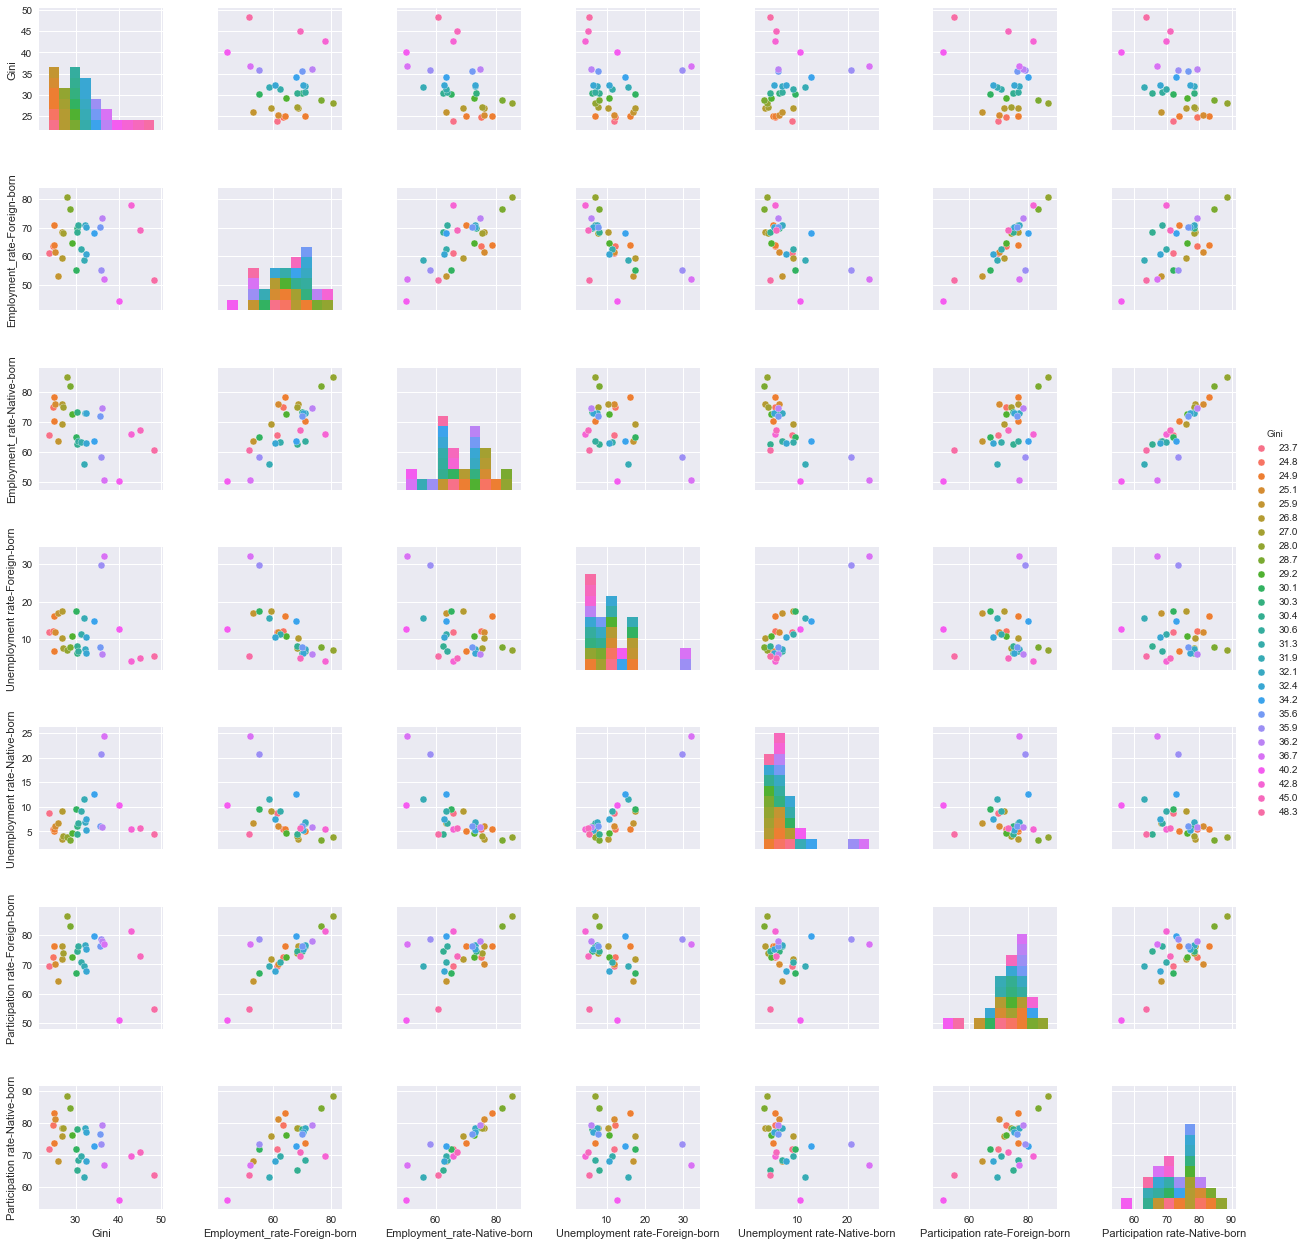

In [10]:
import seaborn as sns
sns.set()

sns.pairplot(df3, hue="Gini")

In [11]:
path = '../data/injurieRoad2006.csv'
df_injur =  pd.read_csv(path, sep=';')
df_injur.head()

,countries,injuries
0,Australia,1571.0
1,Austria,6280.9
2,Belgium,6188.2
3,Canada,6139.0
4,Czech Republic,2738.0


In [12]:
df4 = pd.merge(df, df_injur, on='countries', how='inner')
df4.head()

,countries,Gini,injuries
0,Chile,52.1,2861.7
1,Mexico,48.3,1682.6
2,Israel,42.8,5032.0
3,Russia,42.0,2003.0
4,Turkey,40.2,2317.0


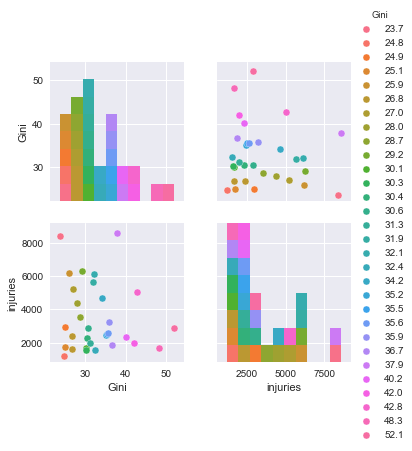

In [13]:
import seaborn as sns
sns.set()

sns.pairplot(df4, hue="Gini")


In [14]:
path = '../data/cancer2012.csv'
df_cancer =  pd.read_csv(path, sep=';')


In [15]:
df_cancer2 = df_cancer.groupby(df_cancer['countries']).sum()

df_cancer2.head()
df_cancer3 = df_cancer2.copy()
df_cancer3['countries'] = df_cancer2.index

In [16]:
df5 = pd.merge(df, df_cancer3, on='countries', how='inner')
df5.head()

,countries,Gini,cancer
0,Colombia,53.5,184.5
1,Chile,52.1,204.0
2,Brazil,51.9,237.6
3,Mexico,48.3,146.8
4,Israel,42.8,340.3


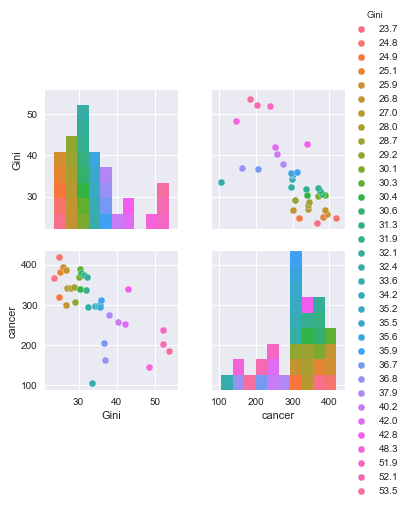

In [17]:
import seaborn as sns
sns.set()

sns.pairplot(df5, hue="Gini")

# CHILDREN

In [18]:
def drawMatrixScatter(path, df):
    df_infant_mortality =  pd.read_csv(path, sep=';')
    df_corr = pd.merge(df, df_infant_mortality, on='countries', how='inner')
    df_corr.head()
    sns.set()
    sns.pairplot(df_corr, hue="Gini")
 

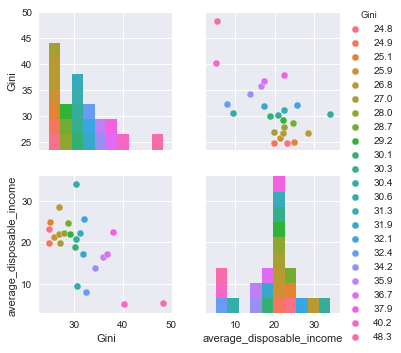

In [19]:
path = '../data/children/average_disposable_income.csv'
drawMatrixScatter(path, df)

Average equivalised household disposable income in households with children (0-17-year-olds), USD PPP thousands, circa 2005.

Income data is average family income for children aged 0-17 years. Data is for various years between 2003 and 2005. It is drawn from national household panel surveys of all OECD countries. Data is converted to common USD using OECD purchasing power parity exchange rates, and equivalised using the square root of the family size.

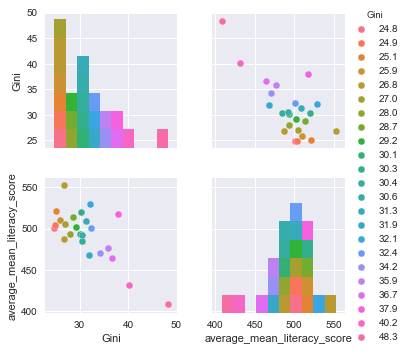

In [20]:
path = '../data/children/average_mean_literacy_score.csv'
drawMatrixScatter(path, df)

Average mean PISA literacy score, 2006.

Mean literacy performance is the average of mathematics, reading and science literacy scores. Data is for 15-year-old students.

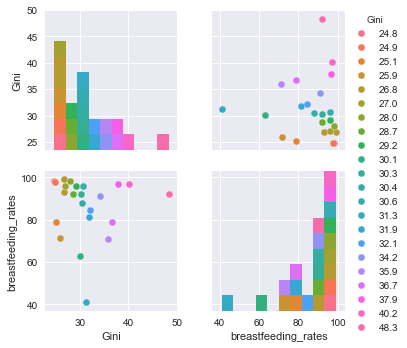

In [21]:
path = '../data/children/breastfeeding_rates.csv'
drawMatrixScatter(path, df)

Breasfeeding rates: having ever breastfed, various years.

Breastfeeding data are for a variety of years. Data is collected using a wide variety of methods, which may affect comparability. Data for Poland is missing. Breastfeeding initiation rates refer to the proportion of mothers who have ever breastfed their newborn.

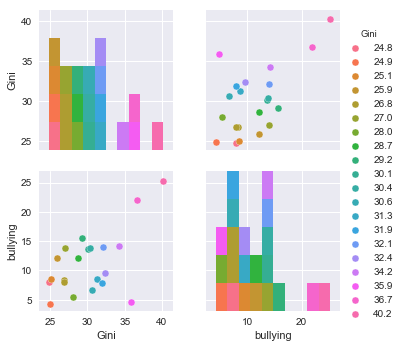

In [22]:
path = '../data/children/bullying.csv'
drawMatrixScatter(path, df)

Children who have been bullied at school at least twice in the last couple of months (11, 13 and 15).

Bullying estimates use reported bullying rates and sample numbers for 11-, 13- and 15-year-old boys and girls to calculate country percentages. Data are for the years 2005/06 from the Health Behaviour in School-aged Children report. A broad definition of bullying does not make clear which forms of bullying are most prevalent in which country, or how long they last. Data are drawn from school-based samples. Data is for 24 OECD countries. Australia, Japan, Korea, Mexico, New Zealand and the Slovak Republic are missing.

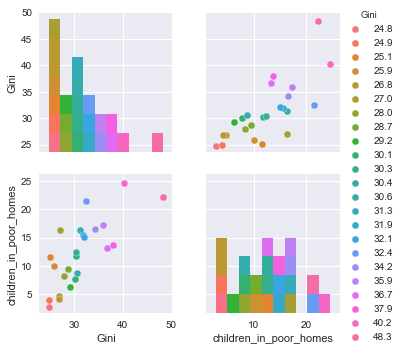

In [23]:
path = '../data/children/children_in_poor_homes.csv'
drawMatrixScatter(path, df)

Children in poor households (50% of median income), 2005.

The child poverty measure used is the proportion of households with children living on an equivalised income below 50% of the national median income for the year 2005. Children are defined as those aged 0-17 years. All OECD countries are included.

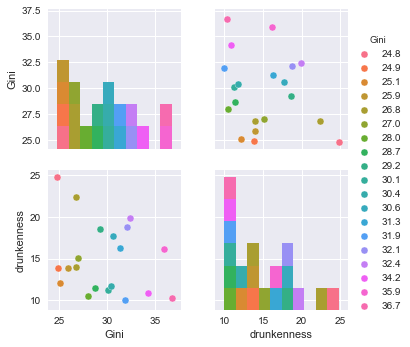

In [24]:
path = '../data/children/drunkenness.csv'
drawMatrixScatter(path, df)

Percentage of 13- and 15-years-old children who have been drunk at least twice, 2005/06.

Data show the proprtions of 13- and 15-years-old children who have been drunk at least twice in 2005/06. Estimates use reported risk-taking rates and sample numbers for 13 and 15-year-old boys and girls to calculate country percentages. Data are for the years 2005/06 from the Health Behaviour in School-aged Children report. The variation in 11-year-old alcohol abuse is small and has not been included in the analysis. Data are drawn from school-based samples. Data is for 24 OECD countries. Australia, Japan, Korea, Mexico New Zealand and Turkey are missing.

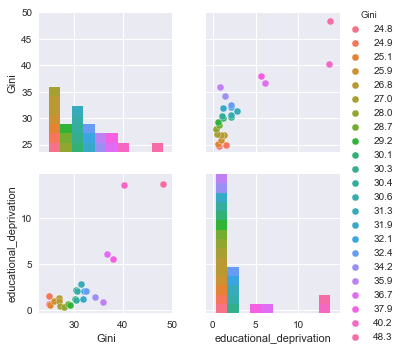

In [25]:
path = '../data/children/educational_deprivation.csv'
drawMatrixScatter(path, df)

Percentage of children reporting less than four educational possessions aged 15 yrs: 2006.

Educational deprivation data are derived from PISA 2006 (OECD/PISA, 2008). PISA asks questions about the possession of eight items, including a desk to study, a quiet place to work, a computer for schoolwork, educational software, an internet connection, a calculator, a dictionary, and school textbooks. The proportion of children reporting less than four of these educational items is used (less than four items best represented results for cut-off points at three, four, five and six items). PISA collection processes employ standardised questionnaires, translation, and monitoring procedures, to ensure high standards of comparability.

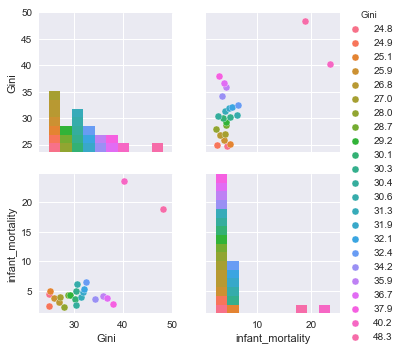

In [26]:
path = '../data/children/infant_mortality.csv'
drawMatrixScatter(path, df)

Infant mortality rates, 2005.

Infant mortality data are for the year 2005. Figures represent the numbers of deaths per 1 000 of the infant population before their first birthday. Data are sourced from administration records.

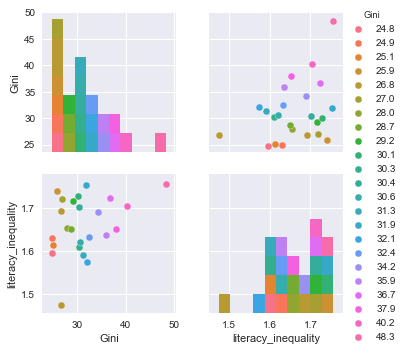

In [27]:
path = '../data/children/literacy_inequality.csv'
drawMatrixScatter(path, df)

Ratio of 90th to 10th percentile score in mean PISA literacy achievement.

The measure is of country inequality in scores, averaged across the three literacy dimensions. The measure of inequality used is the ratio of the score at the 90th percentile to that at the 10th percentile. Data is for 15-year-old students.

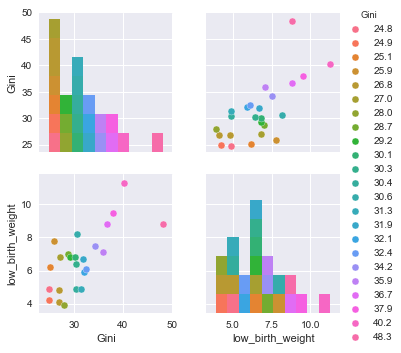

In [28]:
path = '../data/children/low_birth_weight.csv'
drawMatrixScatter(path, df)

ow birth weight (% births less than 2500g): most recent data (2003 - 2005).

The data for low birth weights is for the years 2003 to 2005. The low birth weight indicator is the number of newborns per 100 births who weigh less than 2.5 kilograms. The indicator includes low weight births that are due to multiple births. Additionally, in some countries, because of genetic factors children may be smaller with no associated developmental risk. Exceptions to the use of registered birth data are the Netherlands, where data is taken from a national health interview survey (OECD, 2007, p. 36), and Turkey.

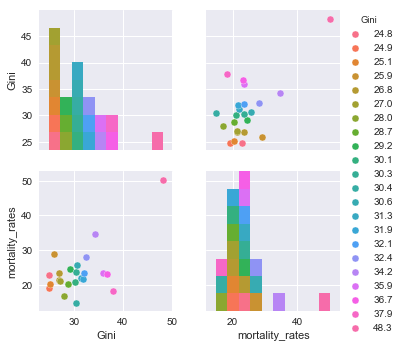

In [29]:
path = '../data/children/mortality_rates.csv'
drawMatrixScatter(path, df)

Deaths per 100000 under 20s: All causes. Three year averages of most recent data.

Data record the number of deaths of children aged 1-19 by each cause per 100 000 of the 1-19 population. Data are averages for the three most recent years (latest years are presented in a separate column in the chart). No data is available for Turkey.

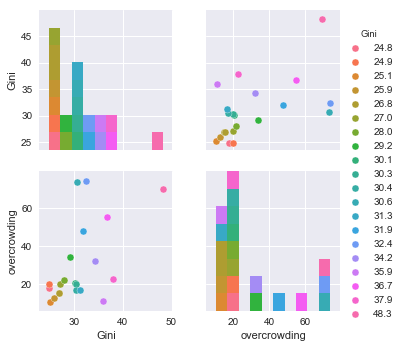

In [30]:
path = '../data/children/overcrowding.csv'
drawMatrixScatter(path, df)

Percentage of children living in overcrowding homes as a proportion of all children (2006).

Overcrowding is assessed though questions on "number of rooms available to the household" for European countries from the Survey on Income and Living Conditions (EU-SILC) conducted in 2006; on the "number of bedrooms" in Australia; on whether the household "cannot afford more than one bedroom" or “cannot afford to have a bedroom separate from eating room” in Japan; and on the "number of rooms with kitchen and without bath" in the United States. Overcrowding is deemed to prevail when the number of household members exceeds the number of rooms (i.e. a family of four is considered as living in an overcrowded accommodation when there are only three rooms – excluding kitchen and bath but including a living room). Data is for various years from 2003 to 2006. The Japanese survey is an unofficial and experimental survey designed by the National Institute of Population and Social Security Research, with a nationally representative sample limited to around 2 000 households and around 6 000 persons aged 20 years and above. Canada, Korea, Switzerland, and Turkey are missing.


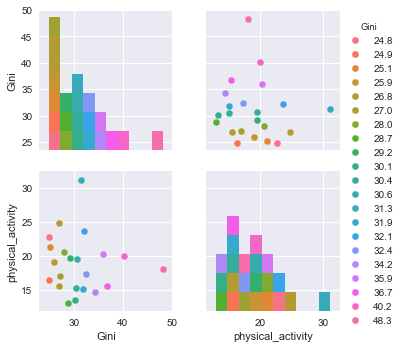

In [31]:
path = '../data/children/Physical activity.csv'
drawMatrixScatter(path, df)

Moderate to vigorous physical activity (11, 13 and 15).

Data for physical activity is calculated based on the regularity of moderate-to-vigorous physical activity as reported by 11, 13 and 15 year olds for the years 2005/06. Moderate-to-vigorous physical activity as defined by the HBSC report refers to exercise undertaken for at least an hour that increases both heart rate and respiration (and leaves the child out of breathe sometimes). Each country estimate uses reported physical activity rates and sample numbers for 11, 13 and 15 year old boys and girls to calculate country percentages. Data are drawn from school-based samples. Data for Mexico was provided by the Mexican Delegation to the OECD Social Policy Division. Data is for 26 OECD countries, Australia, Japan, Korea, Mexico and New Zealand are missing.

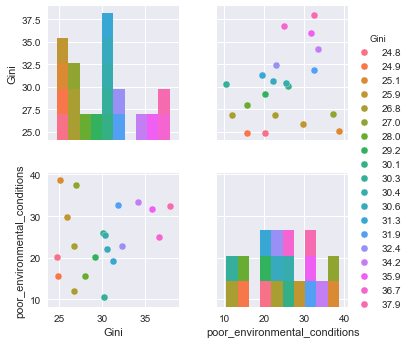

In [32]:
path = '../data/children/poor_environmental_conditions.csv'
drawMatrixScatter(path, df)

Percentage of children living in homes with poor environmental conditions as a proportion of all children (2006).

Local environmental conditions are assessed through questions on whether the household's accommodation "has noise from neighbours or outside" or has "any pollution, grime or other environmental problem caused by traffic or industry" for European countries; whether there is "vandalism in the area", "grime in the area" or "traffic noise from outside" for Australia; whether "noises from neighbours can be heard" for Japan; and whether there is "street noise or heavy street traffic", "trash, litter, or garbage in the street", "rundown or abandoned houses or buildings" or "odors, smoke, or gas fumes" for the United States. Data is for various years from 2003 to 2006. Canada, Korea, Mexico, New Zealand, Switzerland, and Turkey are missing.

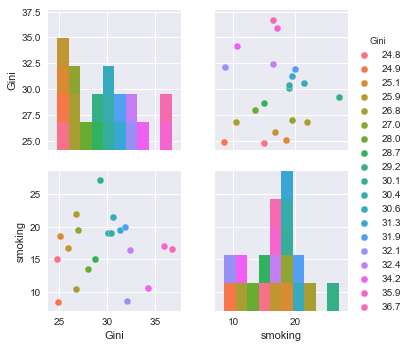

In [33]:
path = '../data/children/smoking.csv'
drawMatrixScatter(path, df)

15 yr olds who smoke at least once a week (no variation for 13 and 11 year olds), 2005/06.

Data show proportions of 15 yr olds who smoke at least once a week (no variation for 13 and 11 year olds) in 2005/06. Data are for the years 2005/06 from the Health Behaviour in School-aged Children report. The variation in 11- and 13-year-old smoking is small and has not been included in the analysis. Data are drawn from school-based samples. Data is for 24 OECD countries. Australia, Japan, Korea, Mexico New Zealand and Turkey are missing.

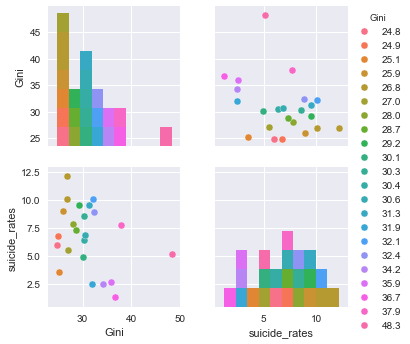

In [34]:
path = '../data/children/suicide_rates.csv'
drawMatrixScatter(path, df)

Suicides of children aged 15-19 per 100000 15-19 year olds. Three year averages of most recent data.

Data record the number of suicides of people aged 15-19 per 100,000 of the 15-19 population. Data are averages for the three most recent years as in Figure 2.14. Comparability of suicide statistics is dependent on reporting mechanisms in each country, as varying degrees of social stigma associated with suicide may lead to variations in under-reporting. No data is available for Turkey. There are no reported female youth suicides in Luxembourg and Iceland during the period.

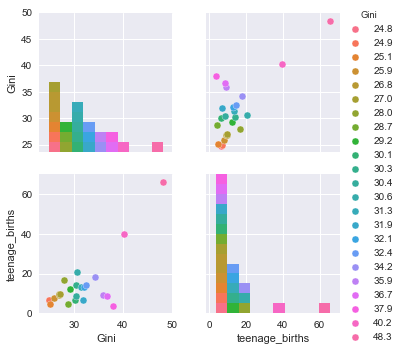

In [35]:
path = '../data/children/teenage_births.csv'
drawMatrixScatter(path, df)

Adolescent fertility rate (births per 1,000 women ages 15-19), 2005.

Teenage birth rates are measured as births per 1 000 15 to 19-year-old females for the year 2005. It should be noted that teenage fertility is not the same as teenage pregnancy. Countries where abortions are more common will have lower teenage fertility rates. Furthermore, in some OECD countries, such as Turkey, women marry earlier, which probably leads to an over-estimation of the social risks and negative outcomes experienced by girls becoming mothers. Physical risks are still age specific. All OECD countries are covered.

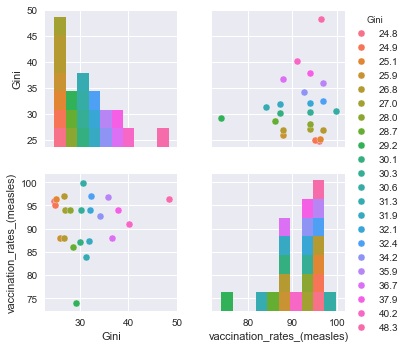

In [36]:
path = '../data/children/vaccination_rates_(measles).csv'
drawMatrixScatter(path, df)

Vaccination rates for pertussis, children aged 2 and incidence of pertussis among total population, 2005 (or latest year available).

Vaccination data are for the years 2003 to 2005. Data are for children at age 2. Data is collected using a variety of methods, which may affect comparability. There is a slight variation in vaccination policies and schedules between countries that may affect comparability (OECD, 2007, p. 120). Data for Luxembourg is missing.

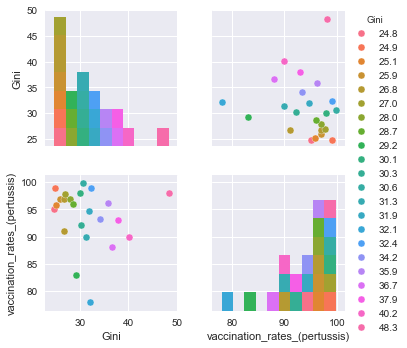

In [37]:
path = '../data/children/vaccination_rates_(pertussis).csv'
drawMatrixScatter(path, df)

Vaccination rates for measles, children aged 2 and incidence of measles among total population, 2005 (or latest year available).

Vaccination data are for the years 2003 to 2005. Data are for children at age 2. Data is collected using a variety of methods, which may affect comparability. There is a slight variation in vaccination policies and schedules between countries that may affect comparability (OECD, 2007, p. 120). Data for Luxembourg is missing.

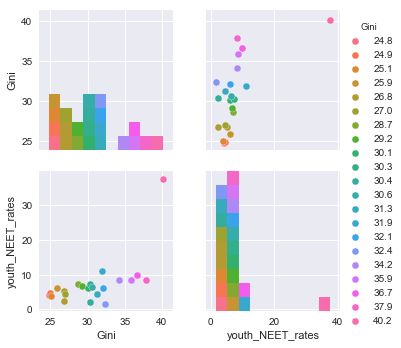

In [41]:
path = '../data/children/youth_NEET_rates.csv'
drawMatrixScatter(path, df)




Percentage of the 15-19 population not in education and unemployed: 2005.

Data records children not in education and not in employment or training. The data cover those aged 15 to 19 years of age in 2006. Data for Mexico is from 2004 and data for Turkey is from 2005. Data for Japan is for the population aged 15 to 24 years. Education and training participation rates are self reported. Surveys and administrative sources may record the age and activity of the respondent at different times of the year. Double counting of youth in a number of different programmes may occur. Data for Iceland and Korea are missing from this comparison.

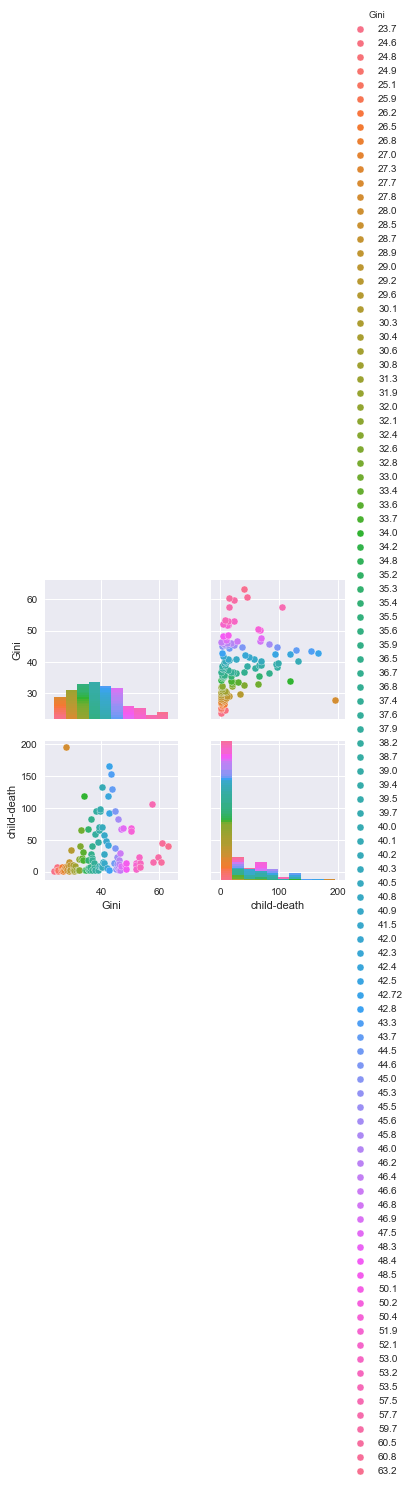

In [44]:
path = '../data/child-death.csv'
drawMatrixScatter(path, df)


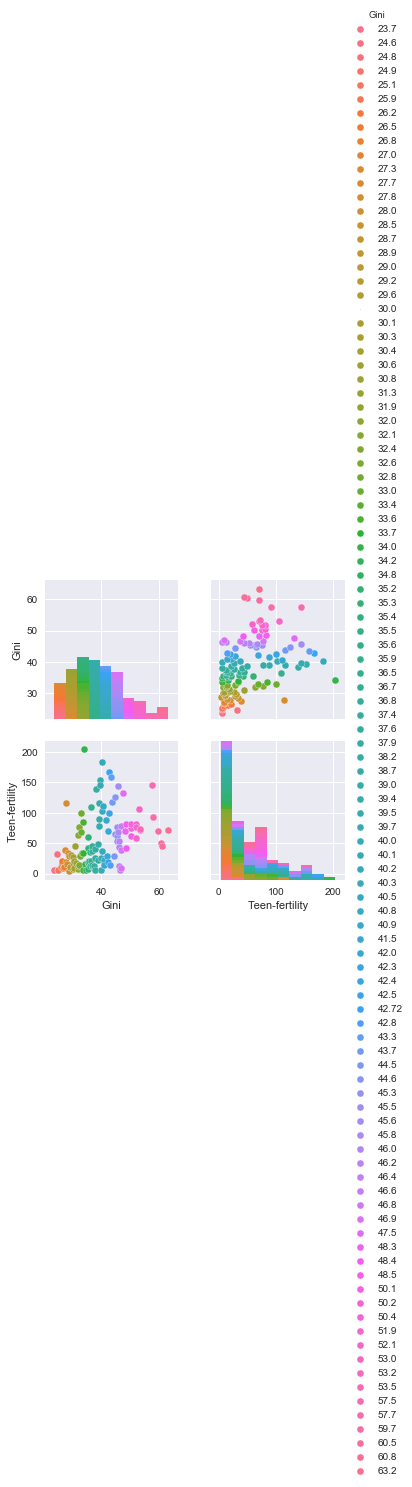

In [45]:
path = '../data/teen-fertility.csv'
drawMatrixScatter(path, df)


In [47]:
path = '../data/gapminder/child-death.csv'
df = pd.read_csv(path, sep =';')
path = '../data/gapminder/teen-fertility.csv'
df2 = pd.read_csv(path, sep =';')

df3 = pd.merge(df, df2, on='countries', how='inner')
df3.head()

,countries,child-death,Teen-fertility
0,Afghanistan,195.188070,115.0
1,Albania,10.526316,11.2
2,Algeria,18.090586,7.0
3,Angola,166.795058,167.0
4,Argentina,6.306837,67.4


In [49]:
df3.to_json('../data/gapminder/correctoutput.json')

In [ ]:
import json
from json import dumps

json_dict = {}
json_dict["name"] = "Json_file"
json_dict['children'] = []